# Mask R-CNN Demo

A quick intro to using the pre-trained model to detect and segment objects.

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

%tensorflow_version 1.x
!pip uninstall keras-nightly
!pip install h5py==2.10.0
!pip install q keras==2.1.6

import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import path
import os


os.chdir('Mask_RCNN/samples')
%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

## Configurations

# We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

class InferenceConfig(coco.CocoConfig):
    # Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
# config.display()

## Create Model and Load Trained Weights

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

## Class Names

# To get the list of class names, you'd load the dataset and then use the ```class_names``` property like this.

# We don't want to require you to download the COCO dataset just to run this demo, so we're including the list of class names below. The index of the class name in the list represent its ID (first class is 0, second is 1, third is 2, ...etc.)

# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 33.27 MiB/s, done.
Resolving deltas: 100% (565/565), done.
  Using cached Keras-2.1.6-py2.py3-none-any.whl (339 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
... done downloading pretrained model!






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








In [ ]:
info = {
    47:{"density":0.95, "shape":'c', "carbs":0.28, "cal": 1.1, "protein": 0.01, "fats":0},
    48:{"density":0.96, "shape":'s', "carbs":0.14, "cal": 0.52, "protein": 0.003, "fats":0.002},
    49:{"density":2.5, "shape":'s', "carbs":0.2, "cal": 2.32, "protein": 0.12, "fats":0.1},
    50:{"density":1.03, "shape":'s', "carbs":0.154, "cal": 0.62, "protein": 0.012, "fats":0.002},
    51:{"density":0.37, "shape":'c', "carbs":0.07, "cal": 0.34, "protein": 0.03, "fats":0},
    52:{"density":1.04, "shape":'c', "carbs":0.096, "cal": 0.41, "protein": 0.009, "fats":0.002},
      }
cm2px = 38 #1cm = 38 px
cms2pxs = 38*38
pxs2cms = 1/cms2pxs

## Run Object Detection

In [ ]:
# # image = skimage.io.imread(os.path.join(IMAGE_DIR, 'applespoon.jpg'))
# file_names = next(os.walk(IMAGE_DIR))[2]
# image = skimage.io.imread('/content/Mask_RCNN/images/ab.jpg')
# results = model.detect([image], verbose=1)
# r = results[0]
# visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [ ]:
def find_factor(results):
  spoon_found = np.where(results[0]['class_ids']==45)
  if len(spoon_found[0]) != 0:
    spoon_found = spoon_found[0][0]
  else:
    return 1
  spoon_mask = results[0]['masks'][:,:,spoon_found].astype(int)
  spoon_area = spoon_mask.sum()
  spoon_cms = spoon_area*pxs2cms
  print(spoon_cms)
  normal_cms = 20
  factor = normal_cms/spoon_cms
  return factor

In [ ]:
def volume(actual_area_f, roi_f, shape_f, id_f):
  if shape_f=='s':
    radius = np.sqrt(actual_area_f/np.pi)
    if id_f not in [54, 55]:
      return (4/3)*np.pi*radius*radius*radius
    else:
      return np.pi*radius*radius*5 #assuming the thickness of the pizza or the donut to be 5 cm
  elif shape_f == 'c':
    height = abs((roi_f[2]-roi_f[0]))/38
    radius = actual_area_f/(2.0*height)
    return np.pi*radius*radius*height

In [ ]:
r = 0
def run_model(impath):
  global r
  # file_names = next(os.walk(IMAGE_DIR))[2]
  # image = skimage.io.imread(os.path.join(IMAGE_DIR, impath))
  image = skimage.io.imread(impath)
  results = model.detect([image], verbose=1)
  r = results[0]
  visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
  id = list(results[0]['class_ids'])
  factor = find_factor(results)
  l = len(id)

  roi = []
  areas = []
  ids = []
  actual_area = []
  volumes = []
  masses = []
  calories = []
  carbs= [] 
  fats = []
  proteins = []

  for k in range(l):
    if 47<=id[k]<=52:
      ids.append(results[0]['class_ids'][k])
      roi.append(results[0]['rois'][k])
      areas.append(results[0]['masks'][:,:,k].astype(int).sum()*pxs2cms)
      actual_area.append(factor*areas[-1])
      inf = info[id[k]]
      volumes.append(round(volume(actual_area[-1], roi[-1], inf['shape'], ids[-1])))
      masses.append(volumes[-1]*(inf['density']))
      carbs.append(masses[-1]*inf['carbs'])
      fats.append(masses[-1]*inf['fats'])
      proteins.append(masses[-1]*inf['protein'])
      calories.append(masses[-1]*inf['cal'])
      print("Detected one ", class_names[ids[-1]], "of mass ", masses[-1], "with", calories[-1], "calories")
    
    '''
    temp = skimage.io.imread(impath)
    mask_obj = results[0]['masks'][:,:,k].astype(int)
    for j in range(3):
          temp[:,:,j] = temp[:,:,j] * mask_obj
    plt.figure(figsize=(8,8))
    plt.imshow(temp)
    '''

In [ ]:
x = [428,422,422,428,442,466,493,531,572,608,661,699,734,776,809,853,884,912,936,955,971,981,979,975,959,932,882,849,788,716,639,553,509,468]
y = [480,444,413,367,322,284,251,209,188,180,172,166,164,174,193,215,239,253,278,310,339,383,424,476,513,557,610,630,653,675,701,669,626,566]
z = list(zip(tuple(y),tuple(x)))
P = path.Path(z)
masked = np.zeros(image.shape[0:2], dtype=int)
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    masked[i][j] = P.contains_points([(i+1,j+1)])
result1 = masked
result2 = r['masks'][:,:,0]
intersection = np.logical_and(result1, result2)
union = np.logical_or(result1, result2)
iou_score = np.sum(intersection) / np.sum(union)
temp = skimage.io.imread('/content/Mask_RCNN/images/bss.jpg')
mask_obj = masked.astype(int)
for j in range(3):
   temp[:,:,j] = temp[:,:,j] * mask_obj
plt.figure(figsize=(8,8))
plt.imshow(temp)

Processing 1 images
image                    shape: (1600, 1500, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


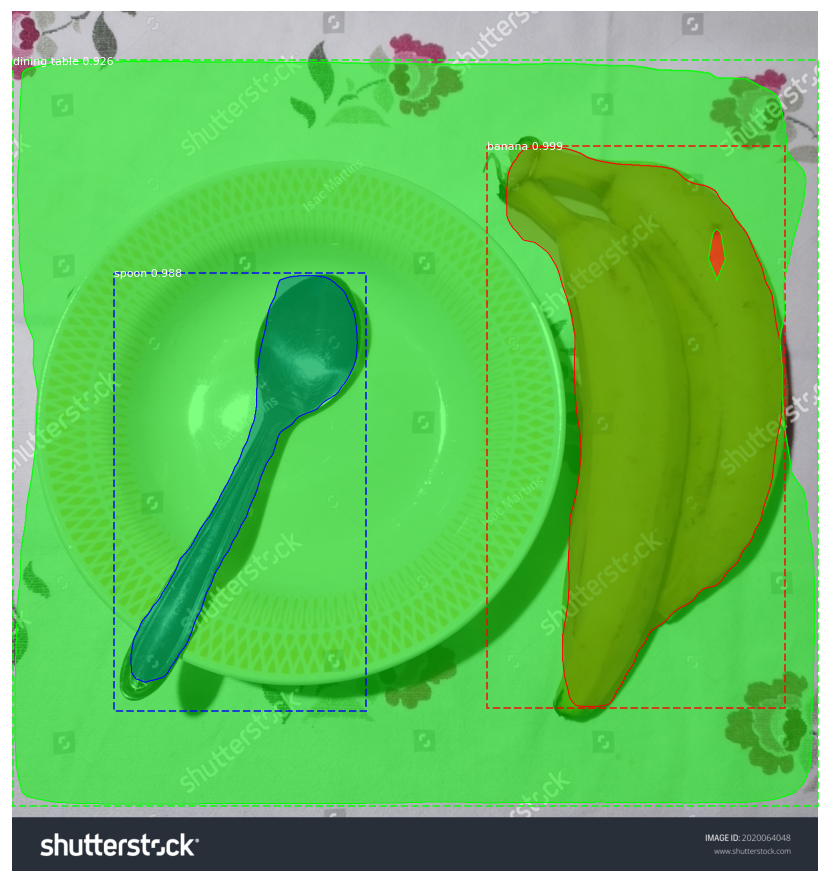

52.646814404432135
Detected one  banana of mass  201.39999999999998 with 221.54 calories


In [ ]:
impath = '/content/Mask_RCNN/images/bss.jpg'
run_model(impath)

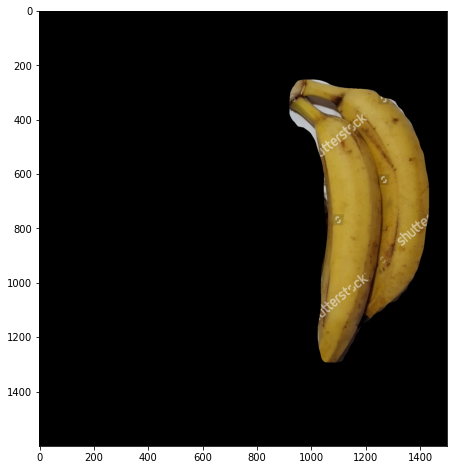

In [ ]:
temp = skimage.io.imread(impath)
mask_obj = r['masks'][:,:,0].astype(int)
for j in range(3):
    temp[:,:,j] = temp[:,:,j] * mask_obj
plt.figure(figsize=(8,8))
plt.imshow(temp)

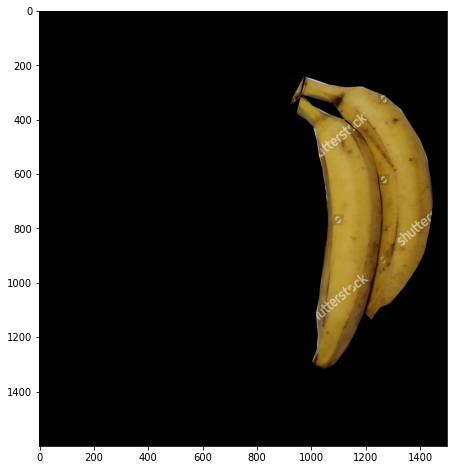

In [ ]:
Y = [947,984,1008,1022,1030,1043,1055,1063,1030,1019,1026,1022,1010,1005,1018,1051,1085,1135,1199,1218,1254,1262,1260,1247,1226,1185,1133,1061,1005,970,918] + [976,961,1082,1114,1125,1167,1193,1228,1244,1257,1262,1255,1233,1210,1196,1223,1255,1292,1345,1392,1417,1438,1449,1445,1427,1401,1332,1271,1188,1127,1067,982]
X = [376,401,425,478,531,584,663,770,1055,1112,1193,1244,1276,1289,1308,1318,1302,1241,1109,1032,864,775,701,600,525,454,404,377,347,311,350] + [236,307,339,387,404,440,464,531,589,697,756,860,961,1063,1111,1136,1090,1077,1013,941,892,795,713,645,538,472,363,311,278,281,271,242]
z = list(zip(X,Y))
image = skimage.io.imread(impath)
P = path.Path(z)
masked = np.zeros(image.shape[0:2], dtype=int)
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    masked[i][j] = P.contains_points([(i+1,j+1)])
temp = skimage.io.imread(impath)
for j in range(3):
    temp[:,:,j] = temp[:,:,j] * masked
plt.figure(figsize=(8,8))
plt.imshow(temp)

In [ ]:
def calc_iou(annx, anny, imshape, ob):
  z = list(zip(annx, anny))
  P = path.Path(z)
  masked = np.zeros(imshape[0:2], dtype=int)
  for i in range(imshape[0]):
    for j in range(imshape[1]):
      masked[i][j] = P.contains_points([(i+1,j+1)])
  result1 = masked
  result2 = r['masks'][:,:,ob]
  intersection = np.logical_and(result1, result2)
  union = np.logical_or(result1, result2)
  iou_score = np.sum(intersection) / np.sum(union)
  print(iou_score)

In [ ]:
calc_iou([906,926,938,953,969,979,985,985,963,934,890,835,784,636,563,489,409,336,300,264,251,251,217,174,168,178,193,233,296,336,375,424,482,529,590,647,705,736,780,791,799,866,882], [367,405,430,466,509,541,596,655,803,906,1007,1109,1196,1320,1354,1376,1376,1354,1316,1259,1202,1149,1101,1062,1044,999,991,1022,1084,1086,1101,1101,1072,1022,928,801,622,519,448,401,353,336,336], temp.shape, 1 )

Processing 1 images
image                    shape: (1600, 1500, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


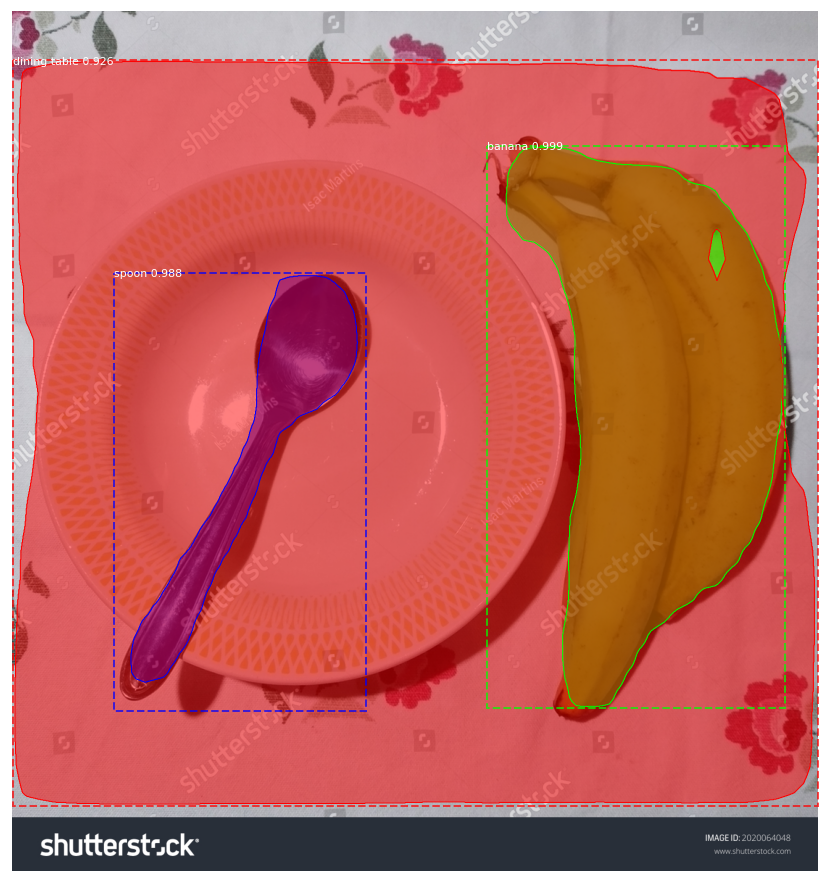

52.646814404432135
Detected one  banana of mass  201.39999999999998 with 221.54 calories


In [ ]:
impath = '/content/Mask_RCNN/images/bss.jpg'
run_model(impath)

In [ ]:
annx = [376,401,425,478,531,584,663,770,1055,1112,1193,1244,1276,1289,1308,1318,1302,1241,1109,1032,864,775,701,600,525,454,404,377,347,311,350] + [236,307,339,387,404,440,464,531,589,697,756,860,961,1063,1111,1136,1090,1077,1013,941,892,795,713,645,538,472,363,311,278,281,271,242]
anny = [947,984,1008,1022,1030,1043,1055,1063,1030,1019,1026,1022,1010,1005,1018,1051,1085,1135,1199,1218,1254,1262,1260,1247,1226,1185,1133,1061,1005,970,918] + [976,961,1082,1114,1125,1167,1193,1228,1244,1257,1262,1255,1233,1210,1196,1223,1255,1292,1345,1392,1417,1438,1449,1445,1427,1401,1332,1271,1188,1127,1067,982]
imshape = image.shape[0:2]
ob = 0
calc_iou(annx, anny, imshape, ob)

0.9170260275752886


Processing 1 images
image                    shape: (408, 612, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


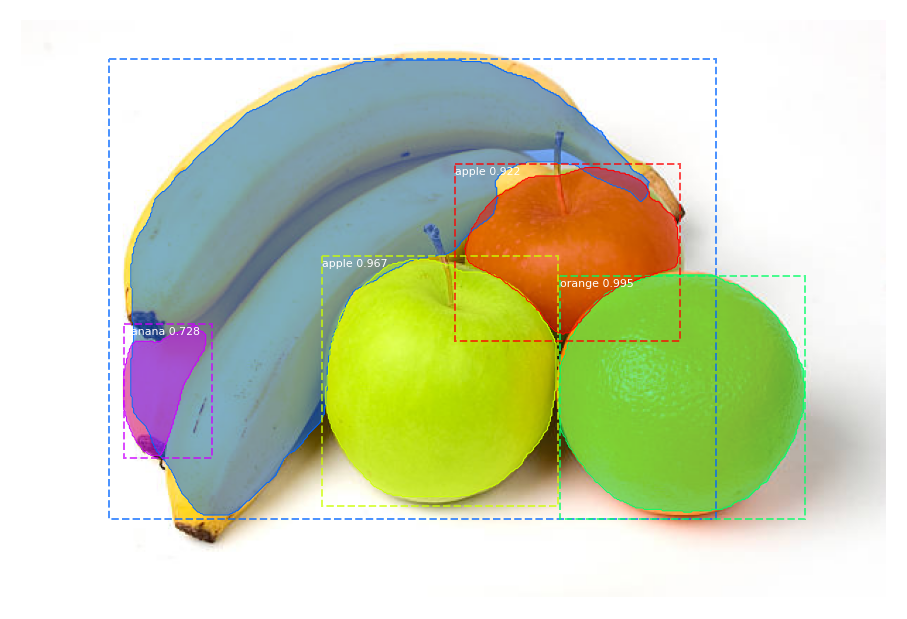

Detected one  banana of mass  125.39999999999999 with 137.94 calories
Detected one  orange of mass  50.47 with 31.2914 calories
Detected one  apple of mass  43.199999999999996 with 22.464 calories
Detected one  apple of mass  15.36 with 7.9872 calories
Detected one  banana of mass  1.9 with 2.09 calories


In [ ]:
impath = '/content/Mask_RCNN/images/abs.jpg'
run_model(impath)

In [ ]:
image = skimage.io.imread(impath)
imshape = image.shape[0:2]
anny_1 = [75,73,82,95,105,121,148,211,244,277,311,340,370,387,398,417,446,441,424,405,389,363,337,313,255,212,188,173,157,142,124,101] + [83,76,73,73,79,81,99,113,129,145,160,176,193,207,231,251,279,313,283,253,210,184,166,143,115,95,81]
annx_1 = [205,183,143,124,108,94,68,36,26,21,23,25,39,53,69,87,103,117,106,103,93,93,92,91,104,127,141,159,175,194,210,220] + [223,237,253,273,289,297,309,267,234,214,195,177,158,148,129,119,104,93,98,105,130,142,167,195,215,223,225]
ob = 0
calc_iou(annx_1, anny_1, imshape, ob)
# Both the bananas taken as one

0.5378453518679409


In [ ]:
anny_2 = [379,379,380,385,394,409,424,449,466,495,515,527,540,551,553,552,546,538,527,509,489,462,442,417,398,391]
annx_2 = [279,268,251,231,210,197,189,178,177,181,191,199,215,236,261,277,297,309,325,338,346,350,349,339,319,303]
ob = 1
calc_iou(annx_2, anny_2, imshape, ob)

0.9592490842490843


In [ ]:
#Similarly IOU for other objects was calculated (ML Project Report)

Processing 1 images
image                    shape: (1280, 1280, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -103.90000  max:  131.30000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


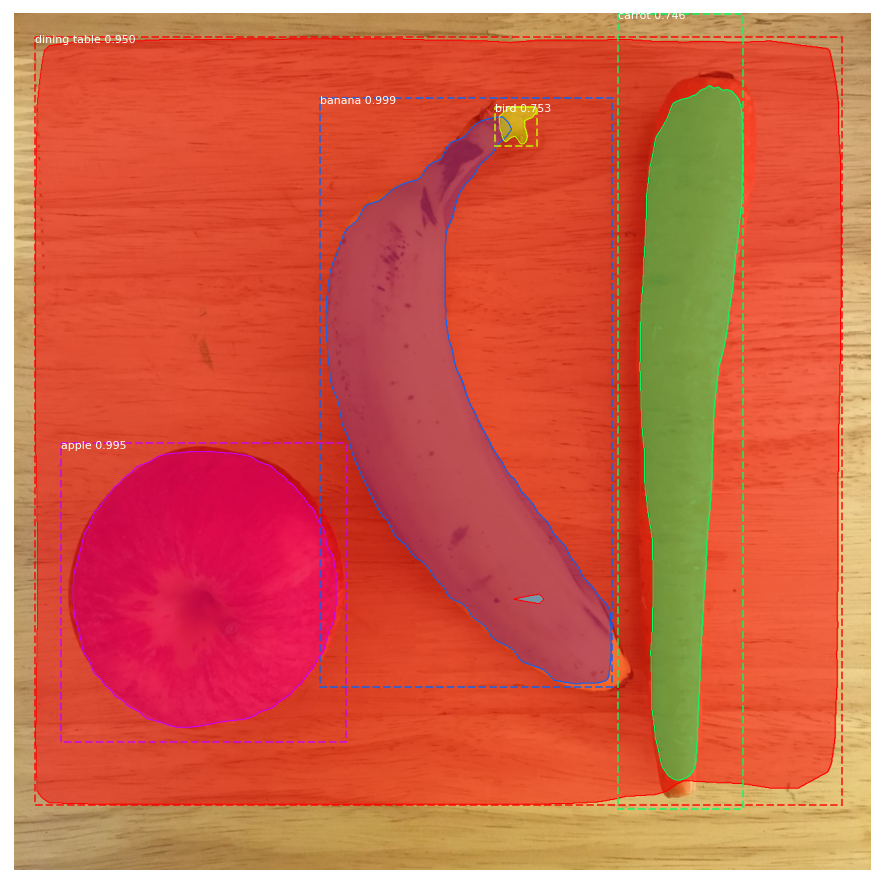

Detected one  banana of mass  333.45 with 366.795 calories
Detected one  apple of mass  607.68 with 315.99359999999996 calories
Detected one  carrot of mass  137.28 with 56.2848 calories


In [ ]:
impath = '/content/Mask_RCNN/images/acb.jpg'
run_model(impath)
image = skimage.io.imread(impath)
imshape = image.shape[0:2]

In [ ]:
x = [81,96,112,150,175,212,246,293,335,377,398,425,450,474,491,493,481,450,385,298,258,191,127,89]
y = [845,805,760,706,689,668,653,645,656,668,679,704,726,764,814,868,934,984,1037,1064,1068,1047,1003,912]
